<a href="https://colab.research.google.com/github/chandbud5/Face_Mask_detection/blob/master/Face_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Getting Dataset

In [2]:
! git clone https://github.com/chandbud5/Face_Mask_detection

Cloning into 'Face_Mask_detection'...
remote: Enumerating objects: 1659, done.
remote: Total 1659 (delta 0), reused 0 (delta 0), pack-reused 1659
Receiving objects: 100% (1659/1659), 134.30 MiB | 11.79 MiB/s, done.
Resolving deltas: 100% (17/17), done.


## Using image generator for augmentation

In [3]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3,
                                                            height_shift_range=0.3,
                                                            zoom_range=0.3,
                                                            rotation_range=0.5,
                                                            shear_range=0.3,
                                                            fill_mode="nearest",
                                                            horizontal_flip=True)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3,
                                                            height_shift_range=0.3,
                                                            zoom_range=0.3,
                                                            rotation_range=0.5,
                                                            shear_range=0.3,
                                                            fill_mode="nearest",
                                                            horizontal_flip=True)

In [4]:
train_data = train_gen.flow_from_directory("/content/Face_Mask_detection/train",
                                           target_size=(180, 180),
                                           batch_size=125,
                                           class_mode="binary")

test_data = test_gen.flow_from_directory("/content/Face_Mask_detection/test",
                                        target_size=(180, 180),
                                        batch_size=25,
                                        class_mode="binary")

Found 1371 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [5]:
train_mask = "/content/Face_Mask_detection/train/with_mask/"
train_wmask = "/content/Face_Mask_detection/train/without_mask/"
test_mask = "/content/Face_Mask_detection/test/with_mask/"
test_wmask = "/content/Face_Mask_detection/test/without_mask/"

wmask_fnames = os.listdir(train_wmask)
mask_fnames = os.listdir(train_mask)

## Building Model

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180,180, 3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [17]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(train_data, epochs=30, verbose=1, validation_data=test_data)
model.save("mask_classifier.h5")

Epoch 1/30
11/11 [==============================] - 14s 1s/step - loss: 63.4519 - accuracy: 0.5033 - val_loss: 0.7407 - val_accuracy: 0.5000
Epoch 2/30
11/11 [==============================] - 14s 1s/step - loss: 0.7420 - accuracy: 0.5201 - val_loss: 0.7022 - val_accuracy: 0.4897
Epoch 3/30
11/11 [==============================] - 14s 1s/step - loss: 0.6856 - accuracy: 0.5456 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 4/30
11/11 [==============================] - 14s 1s/step - loss: 0.6636 - accuracy: 0.5930 - val_loss: 0.5902 - val_accuracy: 0.6959
Epoch 5/30
11/11 [==============================] - 14s 1s/step - loss: 0.6894 - accuracy: 0.6302 - val_loss: 0.6259 - val_accuracy: 0.6959
Epoch 6/30
11/11 [==============================] - 14s 1s/step - loss: 0.6086 - accuracy: 0.6813 - val_loss: 0.5191 - val_accuracy: 0.7474
Epoch 7/30
11/11 [==============================] - 15s 1s/step - loss: 0.5094 - accuracy: 0.7812 - val_loss: 0.4543 - val_accuracy: 0.7680
Epoch 8/30
11/11 [=

29


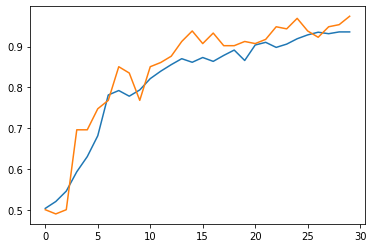

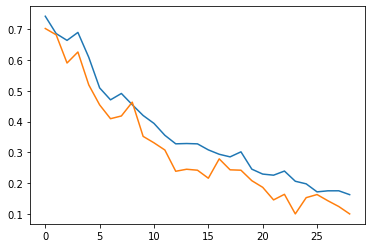

In [25]:
train_acc = history.history['accuracy']
train_loss = history.history['loss'][1:]

test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss'][1:]
print(len(test_loss))
epochs = range(len(train_acc))
epoch_l = range(len(train_acc)-1)

plt.plot(epochs, train_acc)
plt.plot(epochs, test_acc)
plt.show()

plt.plot(epoch_l, train_loss)
plt.plot(epoch_l, test_loss)
plt.show()

# Testing our model

## **IF PREDICTED VALUE IS LESS THAN 0.5 THEN IMAGE IS WITH MASK ELSE IT IS WITHOUT MASK**

In [35]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


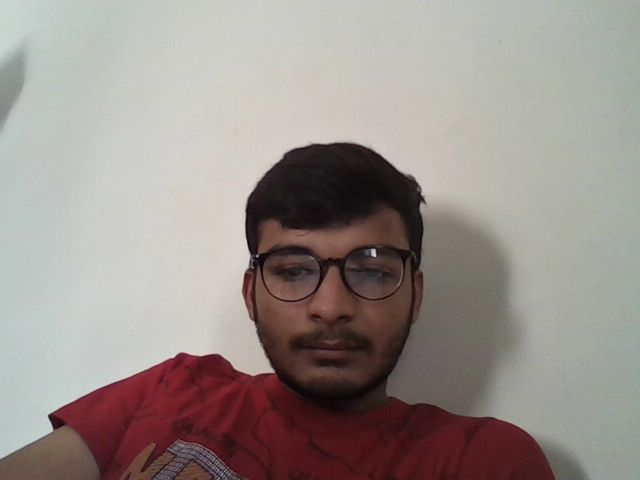

In [106]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  display(Image(filename))
except Exception as err:
  print(str(err))

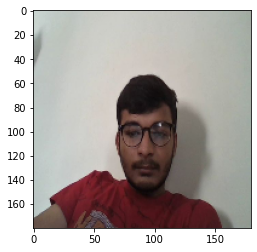

[0.7669347]
Not wearing mask


In [109]:
c = cv2.imread("/content/photo.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction[0])
if prediction[0][0] > 0.5:
    print("Not wearing mask")
else:
    print("Wearing mask")

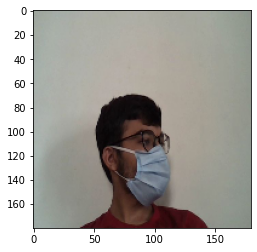

[0.43135417]
Wearing mask


In [74]:
c = cv2.imread("/content/photo1.jpg")
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
new_c = cv2.resize(c,(180, 180))
m = new_c.shape[0]
n = new_c.shape[1]
new_c_r = new_c.reshape(1, m,n,3)
pred_img = test_gen.flow(new_c_r)

plt.imshow(new_c)
plt.show()
prediction = model.predict(pred_img)
print(prediction[0])
if prediction[0][0] > 0.55:
    print("Not wearing mask")
else:
    print("Wearing mask")